In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

file_path = '/Users/RobertHolzmann/Downloads/Blogpost/Datasets/SIPRI_arms_dataset_2022.csv'


df_2022 = pd.read_csv(file_path)
df_2022.head()

,Rank (2022),Rank (2021),Company,Country,Arms Revenue (2022),Arms Revenue (2021),Total Revenue (2022),Arms Revenue as a % of total revenue (2022),Arms Revenue Adjusted (2021)
0,1,1,Lockheed Martin Corp.,United States,59390,60340,65984,90%,65199
1,2,2,Raytheon Technologies,United States,39570,41850,67074,59%,45220
2,3,4,Northrop Grumman Corp.,United States,32300,29880,36602,88%,32286
3,4,3,Boeing,United States,29300,33420,66608,44%,36111
4,5,5,General Dynamics Corp.,United States,28320,27760,39407,72%,29995


In [2]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rank (2022)                                  100 non-null    int64 
 1   Rank (2021)                                  100 non-null    int64 
 2   Company                                      100 non-null    object
 3   Country                                      100 non-null    object
 4   Arms Revenue (2022)                          100 non-null    int64 
 5   Arms Revenue (2021)                          100 non-null    int64 
 6   Total Revenue (2022)                         100 non-null    object
 7   Arms Revenue as a % of total revenue (2022)  100 non-null    object
 8   Arms Revenue Adjusted (2021)                 100 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [3]:
# After exploring the data and having some hiccups, I realized there were place holders for two rows

df_2022[df_2022['Total Revenue (2022)'] == '. .']

,Rank (2022),Rank (2021),Company,Country,Arms Revenue (2022),Arms Revenue (2021),Total Revenue (2022),Arms Revenue as a % of total revenue (2022),Arms Revenue Adjusted (2021)
48,49,51,Bechtel Corp.,United States,2740,2470,. .,. .,2669
55,56,49,General Atomics,United States,2140,2570,. .,. .,2777


In [4]:
# Replace placeholders with NaN
df_2022 = df_2022.replace('. .', np.nan)  
# Drop rows with NaN values
df_2022 = df_2022.dropna()  

In [5]:
# Convert Total Revenue from object to int64
df_2022['Total Revenue (2022)'] = df_2022['Total Revenue (2022)'].astype(np.int64)  
# Remove '%' from column and convert to float 
df_2022['Arms Revenue as a % of total revenue (2022)'] = df_2022['Arms Revenue as a % of total revenue (2022)'].str.rstrip('%').astype(float) / 100.0


In [6]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Rank (2022)                                  98 non-null     int64  
 1   Rank (2021)                                  98 non-null     int64  
 2   Company                                      98 non-null     object 
 3   Country                                      98 non-null     object 
 4   Arms Revenue (2022)                          98 non-null     int64  
 5   Arms Revenue (2021)                          98 non-null     int64  
 6   Total Revenue (2022)                         98 non-null     int64  
 7   Arms Revenue as a % of total revenue (2022)  98 non-null     float64
 8   Arms Revenue Adjusted (2021)                 98 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 7.7+ KB


In [7]:
# Count the number of companies per country
companies_count = df_2022['Country'].value_counts()  

companies_count

United States     40
China              8
United Kingdom     7
France             5
Germany            4
Türkiye            4
South Korea        4
Japan              4
Israel             3
India              3
Trans-European     3
Italy              2
Russia             2
Sweden             1
Taiwan             1
Singapore          1
Poland             1
Canada             1
Ukraine            1
Norway             1
Spain              1
Australia          1
Name: Country, dtype: int64

/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/924825407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=companies_count[:10], palette='bright')


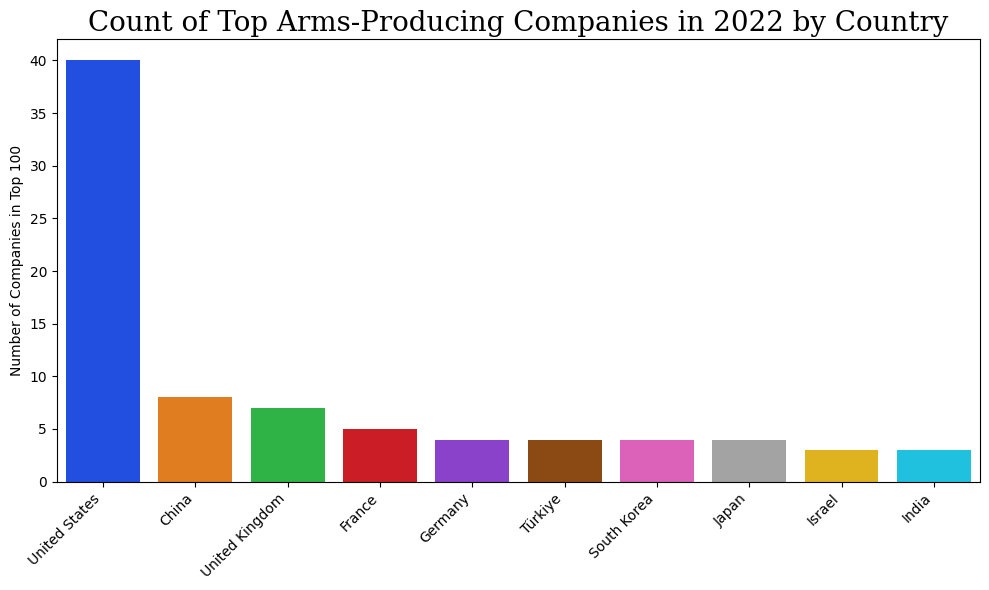

In [8]:
# Create bar graph of arms company counts by country

plt.figure(figsize=(10, 6))
sns.barplot(data=companies_count[:10], palette='bright')

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

plt.title('Count of Top Arms-Producing Companies in 2022 by Country', fontdict=font)
plt.xlabel('')
plt.ylabel('Number of Companies in Top 100')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [9]:
# Creating a new dataframe of the series above
companies_count_2022 = df_2022['Country'].value_counts()

companies_count_2022 = companies_count_2022.reset_index()
companies_count_2022.columns = ['country', 'count']

companies_count_2022

,country,count
0,United States,40
1,China,8
2,United Kingdom,7
3,France,5
4,Germany,4
5,Türkiye,4
6,South Korea,4
7,Japan,4
8,Israel,3
9,India,3


/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/4124509195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'count', y = 'country', data=companies_count_2022[:10], palette='bright')


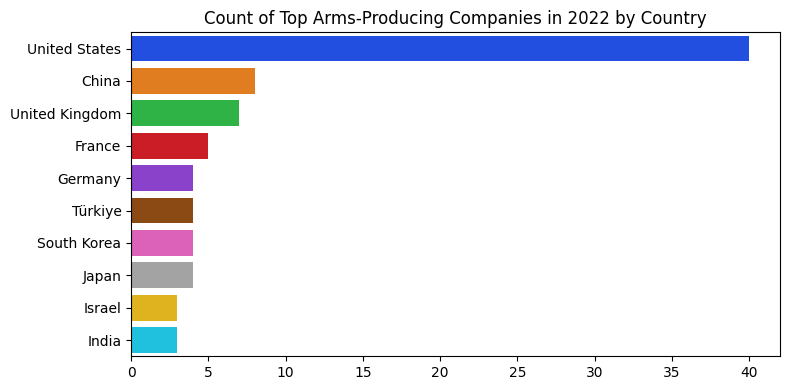

In [10]:
# Creating a barchart of count of arms producing companies per country in 2002

plt.figure(figsize=(8, 4))
#Using seaborn to create a horizontal barchart
sns.barplot(x = 'count', y = 'country', data=companies_count_2022[:10], palette='bright')
plt.xlabel('')
plt.ylabel('')
plt.title('Count of Top Arms-Producing Companies in 2022 by Country')
plt.tight_layout()
plt.show()

In [106]:

# Import plotly.express to create a sunburst chart
import plotly.express as px

# Aggregate market cap by country and company
fig = px.sunburst(
    df_2022,
    path=['Country', 'Company'],
    values='Arms Revenue (2022)',
)

# Format title of plot
fig.update_layout(
    title=dict(
        text="Arms Revenue of Companies by Country 2022",
        x=0.5,
        font=dict(
            family="Times New Roman, serif",  # Change font
            size=33
        )
    ),
    width=800,  # Width of the plot
    height=800,  # Height of the plot
    margin=dict(t=50, l=5, r=5, b=30)  # Adjust margins for larger plot
)

fig.update_traces(
#   insidetextorientation='radial',  # Create radial text for legibility  
    hovertemplate='<b>%{label}</b><br>Revenue: $%{value:.1f}',  # Hover to show revenue
)

# Add the total revenue for the year at the bottom
fig.add_annotation(
    x=0, y=0,  # x, y coordinates in plot
    text="TOTAL REVENUE: $592.3 B",
    showarrow=False,
    font=dict(family="Times New Roman, serif", weight="bold", size=20)
)

fig.show()

In [135]:
# Import plotly.express to create a sunburst chart
import plotly.express as px

# Aggregate market cap by country and company
fig = px.sunburst(
    df_2022,
    path=['Country', 'Company'],
    values='Arms Revenue (2022)',
)

# Format title of plot
fig.update_layout(
    title=dict(
        text="Arms Revenue of Companies by Country 2022",
        x=0.5,
        font=dict(family="Times New Roman, serif",size=40)
    ),
    width=1000,
    height=1000,
    margin=dict(t=80, l=5, r=5, b=30)
)

# Hovertemplate to display values in billions
fig.update_traces(
    textfont=dict(size=18),
    hovertemplate='<b>%{label}</b><br>Revenue: $%{value:.1f}B',
    values=fig.data[0].values / 1000  # Convert revenue in millions to billions
)

# Add the total revenue for the year at the bottom
fig.add_annotation(
    x=0, y=0,
    text="TOTAL REVENUE: $592.3B",
    showarrow=False,
    font=dict(family="Times New Roman, serif", size=25)
)

fig.show()


In [104]:
#Calculate the total revenue for 2022

total_revenue_2022 = df_2022['Arms Revenue (2022)'].sum() / 1000

total_revenue_2022

592.34

In [12]:
# The above graph is a little messy
# I wanted to see what a sunburst of only top 10 countries and companies looked like 

# Get the top 10 countries by total revenue
top_countries = df_2022.groupby('Country')['Arms Revenue (2022)'].sum().nlargest(5).index

# Filter the dataset to include only the top 10 countries
df_top_countries = df_2022[df_2022['Country'].isin(top_countries)]

# For each of these top 10 countries, get the top 5 companies by revenue
top_companies_per_country = df_top_countries.groupby('Country').apply(
    lambda x: x.nlargest(5, 'Arms Revenue (2022)')
).reset_index(drop=True)

# Prepare the data for the sunburst chart
fig = px.sunburst(
    top_companies_per_country,
    path=['Country', 'Company'],
    values='Arms Revenue (2022)'
)

fig.update_layout(
    title_text='Arms Revenue of Companies by Country in 2022',  # Set the title of the plot
    title_x=0.5,  # Center the title horizontally
    title_font_size=20, 
    width=600,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(t=50, l=5, r=5, b=20) # Adjust margins for larger plot
)

fig.update_traces(
    # insidetextorientation='radial',  # Create radial text for legibility  
    hovertemplate='<b>%{label}</b><br>Revenue: %{value:,.2f}',  # Customize hover to show revenue
    rotation=-4 # Adjust rotation for aesthetic purposes 
)

fig.show()


In [13]:
# After looking at the 2022 data, I thought I'd look back 20 years to the 2002 SIPRI data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

file_path = '/Users/RobertHolzmann/Downloads/Blogpost/Datasets/SIPRI_arms_dataset_2002.csv'

df_2002 = pd.read_csv(file_path)


df_2002

,Rank (2002),Company,Country,Arms Revenue (2002),Arms Revenue 2002 (Adjusted),Total Revenue (2002),Arms Revenue as a % of total revenue (2002)
0,1,Boeing,United States,23560,38349,54069,44%
1,2,Northrop Grumman Corp.,United States,21000,34182,22652,93%
2,3,Lockheed Martin Corp.,United States,18870,30715,26578,71%
3,4,BAE Systems,United Kingdom,14070,18627,18233,77%
4,5,Raytheon,United States,12020,19565,16760,72%
...,...,...,...,...,...,...,...
95,96,ADI,Australia,330,697,394,84%
96,97,UMPO,Russia,320,753,341,94%
97,98,Denel,South Africa,320,545,415,77%
98,99,Ultra Electronics Group,United Kingdom,320,424,390,82%


In [14]:
df_2002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rank (2002)                                  100 non-null    int64 
 1   Company                                      100 non-null    object
 2   Country                                      100 non-null    object
 3   Arms Revenue (2002)                          100 non-null    int64 
 4   Arms Revenue 2002 (Adjusted)                 100 non-null    int64 
 5   Total Revenue (2002)                         100 non-null    object
 6   Arms Revenue as a % of total revenue (2002)  100 non-null    object
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [15]:
# As with the previous dataframe, we need to clean up the placeholders 
df_2002[df_2002['Total Revenue (2002)'] == '. .']

,Rank (2002),Company,Country,Arms Revenue (2002),Arms Revenue 2002 (Adjusted),Total Revenue (2002),Arms Revenue as a % of total revenue (2002)
24,25,DynCorp,United States,1360,2214,. .,. .
86,87,Raytheon Aerospace Company,United States,370,602,. .,. .


In [16]:
# Replace placeholders with NaN
df_2002 = df_2002.replace('. .', np.nan)  
# Drop rows with NaN values
df_2002 = df_2002.dropna()  

In [17]:
# Convert Total Revenue from object to int64
df_2002['Total Revenue (2002)'] = df_2002['Total Revenue (2002)'].astype(np.int64)  
# Convert object with '%' to decimal percent
df_2002['Arms Revenue as a % of total revenue (2002)'] = df_2002['Arms Revenue as a % of total revenue (2002)'].str.rstrip('%').astype(float) / 100.0



In [18]:
# Create a list of the country counts for the top 100 defense companies in 2002

companies_count_2002 = df_2002['Country'].value_counts()

companies_count_2002 

United States     40
United Kingdom    11
France             8
Japan              6
Israel             5
Germany            5
Russia             4
India              3
Italy              3
Trans-European     2
South Korea        2
Spain              2
Sweden             1
Singapore          1
Switzerland        1
Canada             1
Norway             1
Australia          1
South Africa       1
Name: Country, dtype: int64

In [19]:
# Creating a new dataframe of the series above
companies_count_2002 = df_2002['Country'].value_counts()

companies_count_2002 = companies_count_2002.reset_index()
companies_count_2002.columns = ['country', 'count']

companies_count_2002

,country,count
0,United States,40
1,United Kingdom,11
2,France,8
3,Japan,6
4,Israel,5
5,Germany,5
6,Russia,4
7,India,3
8,Italy,3
9,Trans-European,2


/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/3751079155.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




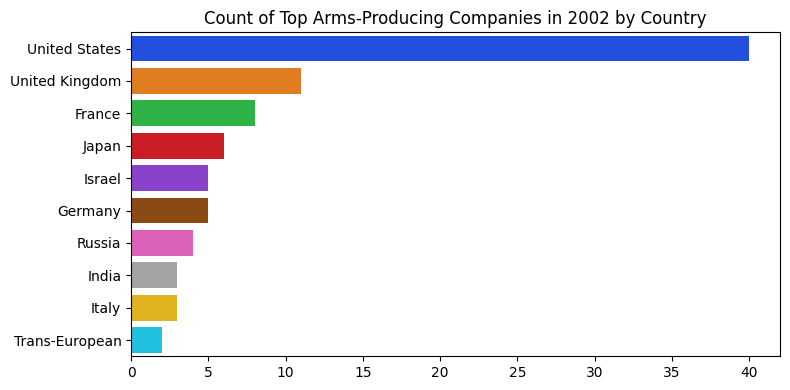

In [20]:
# Creating a barchart of count of arms producing companies per country in 2002

plt.figure(figsize=(8, 4))
#Using seaborn to create a horizontal barchart
sns.barplot(x = 'count', y = 'country', data=companies_count_2002[:10], palette='bright')
plt.xlabel('')
plt.ylabel('')
plt.title('Count of Top Arms-Producing Companies in 2002 by Country')
plt.tight_layout()
plt.show()

In [139]:
# Creating a sunburst chart for the 2002 data, as I did for the 2022 data

# Aggregate revenue by country and company
fig = px.sunburst(
    df_2002,
    path=['Country', 'Company'],
    values='Arms Revenue 2002 (Adjusted)'
)

fig.update_layout(
    title=dict(
        text="Arms Revenue of Companies by Country 2002",
        x=0.5,
        font=dict(family="Times New Roman, serif",size=40)
    ),
    width=1000,  # Width of the plot
    height=1000,  # Height of the plot
    margin=dict(t=80, l=5, r=5, b=20) # Adjust margins for larger plot
)

fig.update_traces(    
    textfont=dict(size=18),
    hovertemplate='<b>%{label}</b><br>Revenue: $%{value:,.1f}B',  # Customize hover to show revenue
    values=fig.data[0].values / 1000,  # Convert revenue in millions to billions
    rotation=-27
)

# Add the total revenue for the year at the bottom
fig.add_annotation(
    x=0, y=0,
    text="TOTAL REVENUE: $315.3B",
    showarrow=False,
    font=dict(family="Times New Roman, serif", size=25)
)

fig.show()

In [89]:
#Calculate the total revenue for 2002
total_revenue_2002 = df_2002['Arms Revenue 2002 (Adjusted)'].sum() / 1000

total_revenue_2002

315.341

In [22]:
# Again, as I did above, create a sunburst chart of only top 10 countries 
# and their top 5 companies 

# Get the top 10 countries by total revenue
top_countries = df_2002.groupby('Country')['Arms Revenue (2002)'].sum().nlargest(5).index

# Filter the dataset to include only the top 10 countries
df_top_countries = df_2002[df_2002['Country'].isin(top_countries)]

# For each of these top 10 countries, get the top 5 companies by revenue
top_companies_per_country = df_top_countries.groupby('Country').apply(
    lambda x: x.nlargest(5, 'Arms Revenue (2002)')
).reset_index(drop=True)

# Aggregate revenue by country and company
fig = px.sunburst(
    top_companies_per_country,
    path=['Country', 'Company'],
    values='Arms Revenue (2002)'
)

fig.update_layout(
    title=dict(
        text="Arms Revenue of Companies by Country 2002",
        x=0.5,
        font=dict(family="Times New Roman, serif", size=28)
    ),
    width=600,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(t=50, l=5, r=5, b=20) # Adjust margins for larger plot
)

fig.update_traces(
#   insidetextorientation='radial',  # Create radial text for legibility  
    hovertemplate='<b>%{label}</b><br>Revenue: %{value:,.2f}',  # Customize hover to show revenue    
    rotation=-28) # Change rotation for aesthetic purposes


fig.show()


In [43]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# I wanted to put both sunburst charts on the same plot, to better show the difference. 
# I may have gotten a little OCD on the formatting of the graph... but I like the way it turned out

# Define the first sunburst chart for 2002
top_countries_2002 = df_2002.groupby('Country')['Arms Revenue (2002)'].sum().nlargest(5).index
df_top_countries_2002 = df_2002[df_2002['Country'].isin(top_countries_2002)]
top_companies_per_country_2002 = df_top_countries_2002.groupby('Country').apply(
    lambda x: x.nlargest(5, 'Arms Revenue (2002)')
).reset_index(drop=True)

# Assign creates a temp column to format from millions to billions.
fig1 = px.sunburst(
    top_companies_per_country_2002.assign(**{'Arms Revenue (2002)': top_companies_per_country_2002['Arms Revenue (2002)'] / 1000}),
    path=['Country', 'Company'],
    values='Arms Revenue (2002)'
)
fig1.update_layout(
    title_text='Arms Revenue of Companies by Country in 2002',  
    title_x=0.5,  
    title_font_size=20,  
    margin=dict(t=30, l=10, r=10, b=10)
)
fig1.update_traces(
    hovertemplate='<b>%{label}</b><br>Revenue: $%{value:.1f}B',    
    rotation=-28
)

# Define the second sunburst chart for 2022
top_countries_2022 = df_2022.groupby('Country')['Arms Revenue (2022)'].sum().nlargest(5).index
df_top_countries_2022 = df_2022[df_2022['Country'].isin(top_countries_2022)]
top_companies_per_country_2022 = df_top_countries_2022.groupby('Country').apply(
    lambda x: x.nlargest(5, 'Arms Revenue (2022)')
).reset_index(drop=True)

# Assign creates a temp column to format from millions to billions.
fig2 = px.sunburst(
    top_companies_per_country_2022.assign(**{'Arms Revenue (2022)': top_companies_per_country_2022['Arms Revenue (2022)'] / 1000}),
    path=['Country', 'Company'],
    values='Arms Revenue (2022)'
)
fig2.update_layout(
    title_text='Arms Revenue of Companies by Country in 2022',  
    title_x=0.5,  
    title_font_size=20, 
    margin=dict(t=30, l=10, r=10, b=10)
)
fig2.update_traces(
    hovertemplate='<b>%{label}</b><br>Revenue: $%{value:.1f}B',  
    rotation=-4 
)

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "sunburst"}, {"type": "sunburst"}]],
    subplot_titles=("2002", "2022"),
    horizontal_spacing=0.02  # Horizontal spacing between the plots
)

# Add traces
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

fig.update_layout(
    title=dict(
        text="Arms Revenue of Companies by Country: 2002 vs 2022",
        x=0.5,
        font=dict(
            family="Times New Roman, serif",  # Change font
            size=40
        )
    ),
    width=1000,  # Overall width of the plot
    height=600,  # Overall height of the plot
    margin=dict(t=70, l=20, r=20, b=20),  # Margins of plot
    annotations=[
        dict(
            text="2002",
            x=0.25,  # X position for the first subplot title
            y=0.98,  # Y position 
            font=dict(
                family="Times New Roman, serif",  # Change font
                size=28
            ),
            showarrow=False
        ),
        dict(
            text="2022",
            x=0.75,  # X position for the second subplot title
            y=0.98,  # Y position
            font=dict(
                family="Times New Roman, serif",  # Change font
                size=28
            ),
            showarrow=False
        )
    ]
)

fig.show()


/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/2953775850.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/2953775850.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




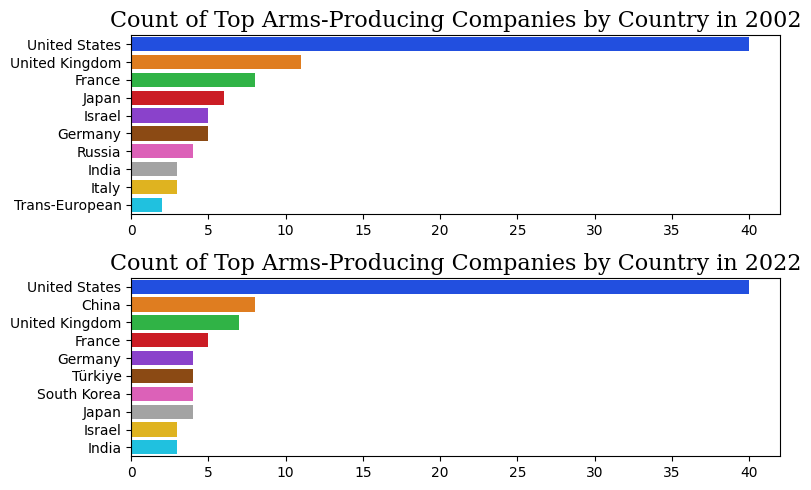

In [34]:
# Define the font properties for the titles
title_font = {'family': 'serif',  
              'size': 16}   

# Create a figure with two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# First bar chart: Count of arms producing companies per country in 2002
sns.barplot(ax=ax1, x='count', y='country', data=companies_count_2002[:10], palette='bright')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Count of Top Arms-Producing Companies by Country in 2002', fontdict=title_font)

# Second bar chart: Count of arms producing companies per country in 2022
sns.barplot(ax=ax2, x='count', y='country', data=companies_count_2022[:10], palette='bright')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Count of Top Arms-Producing Companies by Country in 2022', fontdict=title_font)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [25]:
# I'd like to see the percent revenue change per county from 2021 to 2022 in a pretty barchart 

# First I'll need to create a new column for that percent change 
df_2022['revenue_change'] = ((df_2022['Arms Revenue (2022)']/df_2022['Arms Revenue (2021)'])-1)*100

df_2022.head()

,Rank (2022),Rank (2021),Company,Country,Arms Revenue (2022),Arms Revenue (2021),Total Revenue (2022),Arms Revenue as a % of total revenue (2022),Arms Revenue Adjusted (2021),revenue_change
0,1,1,Lockheed Martin Corp.,United States,59390,60340,65984,0.90,65199,-1.574412
1,2,2,Raytheon Technologies,United States,39570,41850,67074,0.59,45220,-5.448029
2,3,4,Northrop Grumman Corp.,United States,32300,29880,36602,0.88,32286,8.099063
3,4,3,Boeing,United States,29300,33420,66608,0.44,36111,-12.327947
4,5,5,General Dynamics Corp.,United States,28320,27760,39407,0.72,29995,2.017291


/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/1654458390.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




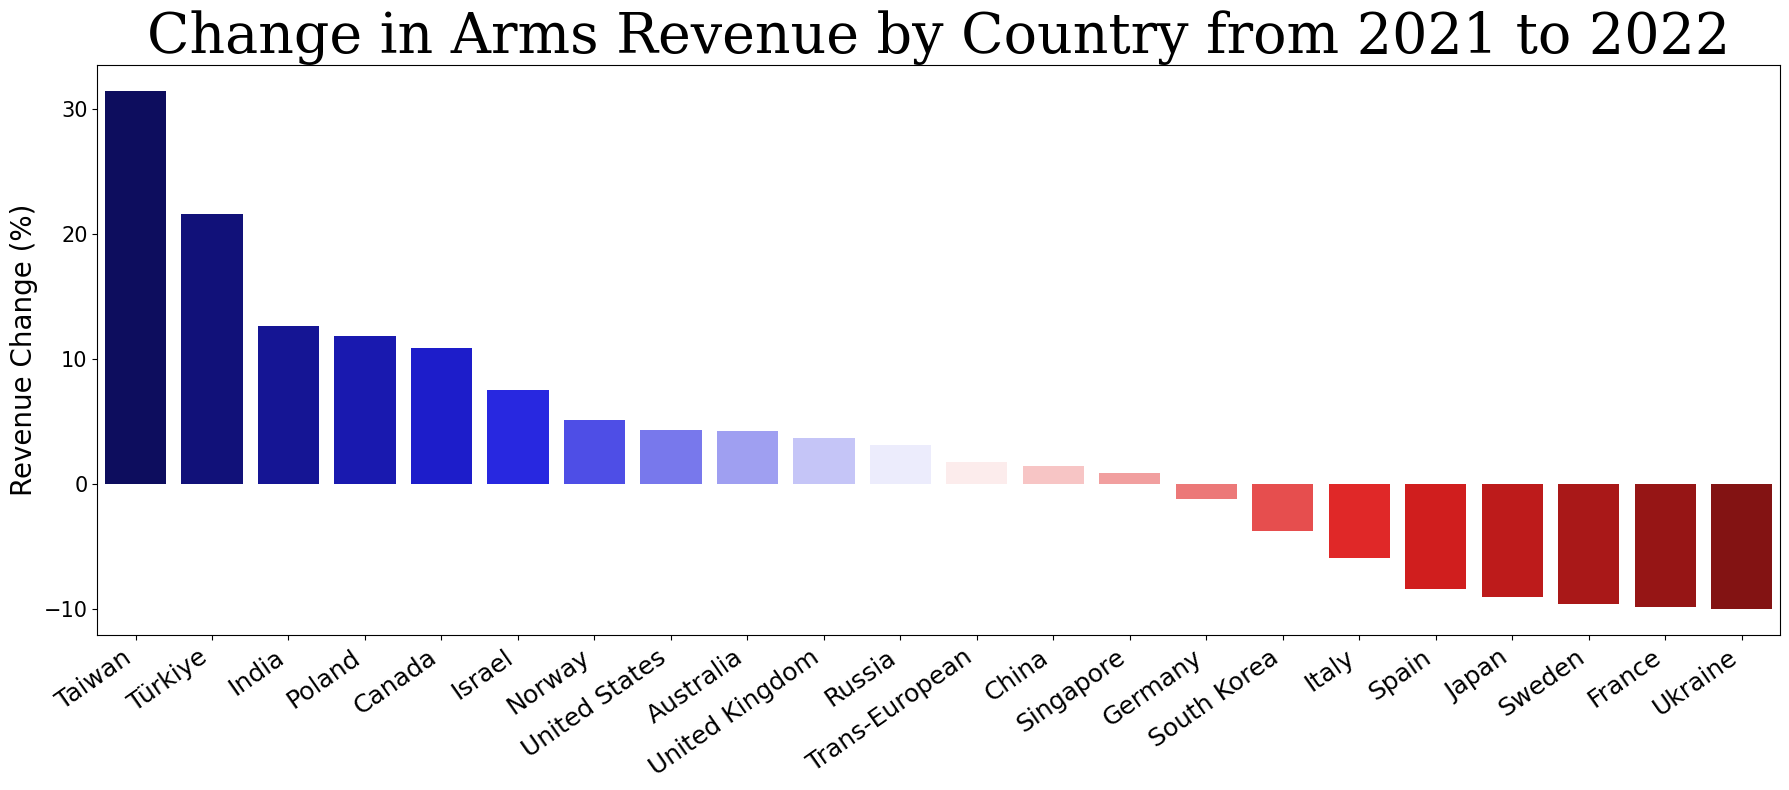

In [146]:

plt.figure(figsize=(18,8))

# Aggregate the revenue change by country 
rev_change = df_2022.groupby('Country')['revenue_change'].mean().sort_values(ascending=False)

# Graph the revenue change by country 
sns.barplot(x=rev_change.index,y=rev_change, palette='seismic')

# Create a fontdict for title 
font = {'family': 'serif',
        'weight': 'normal',
        'size': 40
       }

plt.title('Change in Arms Revenue by Country from 2021 to 2022',fontdict=font)
plt.ylabel('Revenue Change (%)',fontsize=20)
plt.xlabel('')
plt.xticks(rotation=35, ha='right',fontsize=18)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [27]:
# Now using the 2002 data, I'd like to see the revenue change over the past 20 years 

# Create a new column for the percent change from 2002-2022
df_2022['revenue_change_total'] = ((df_2022['Arms Revenue (2022)']/df_2002['Arms Revenue 2002 (Adjusted)'])-1)*100


/var/folders/ww/g22rd79j2xgfxy8trypcnk200000gn/T/ipykernel_84848/279606622.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




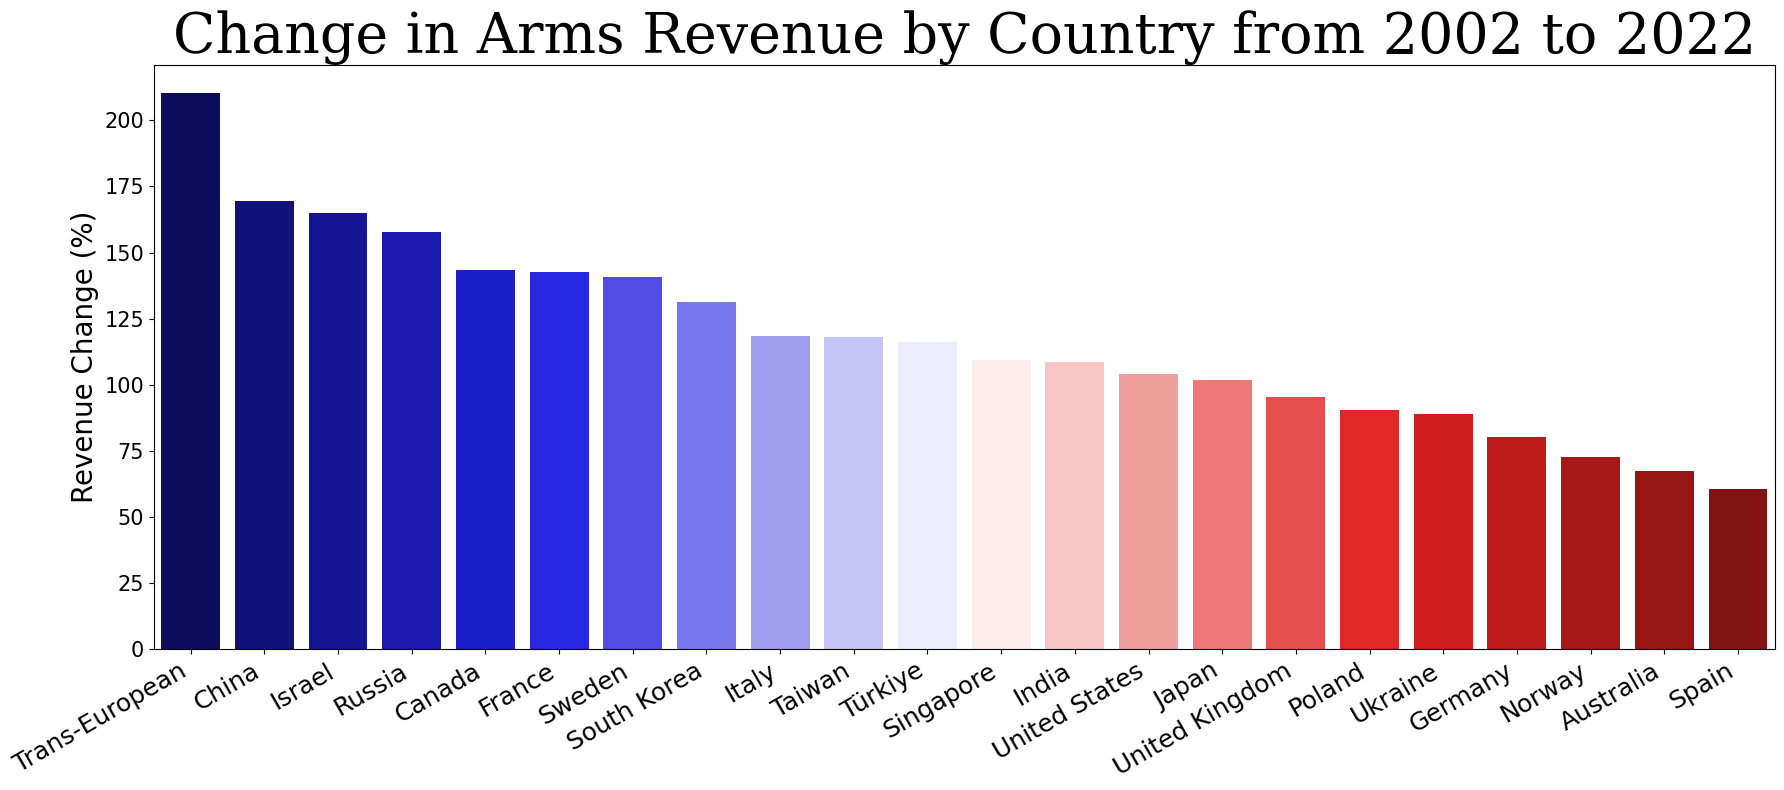

In [144]:

plt.figure(figsize=(18,8))

# Aggregate the revenue change by country 
rev_change_total = df_2022.groupby('Country')['revenue_change_total'].mean().sort_values(ascending=False)

# Graph the revenue change by country from 2002-2022
sns.barplot(x=rev_change_total.index,y=rev_change_total, palette='seismic')

# Create a fontdict for title 
font = {'family': 'serif',
        'weight': 'normal',
        'size': 40
       }

plt.title('Change in Arms Revenue by Country from 2002 to 2022',fontdict=font)

plt.ylabel('Revenue Change (%)',fontsize=20)
plt.xlabel('')
plt.xticks(rotation=30, ha='right',fontsize=18) 
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [29]:
# This is a different data set from SIPRI that shows revenue totals
# It's a more complete picture of revenue than the more selective defense contractors dataset
# I created the same graph of key world events as my other analysis

# Load the dataset
file_path = '/Users/RobertHolzmann/Downloads/Blogpost/Datasets/Total_arms_revenue_2002-2022.csv'
df = pd.read_csv(file_path)

df

,Unnamed: 0,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2002–2022
0,current US$ (billion),201.0,239,274,291,316,349,390,404,421,...,399,452,465,484,516,556,571,600,597,NaN
1,% change,NaN,18.9%,14.7%,6.2%,8.3%,10.5%,11.9%,3.5%,4.1%,...,-1.7%,13.1%,2.9%,4.2%,6.4%,7.8%,2.8%,5.0%,-0.4%,197.0%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,constant 2022 US$ (billion),318.0,355,387,398,419,438,466,500,508,...,439,522,543,552,572,616,627,619,597,NaN
4,% change,NaN,11.6%,8.9%,3.0%,5.1%,4.5%,6.6%,7.3%,1.6%,...,-2.6%,19.0%,4.0%,1.8%,3.6%,7.7%,1.8%,-1.3%,-3.5%,87.7%


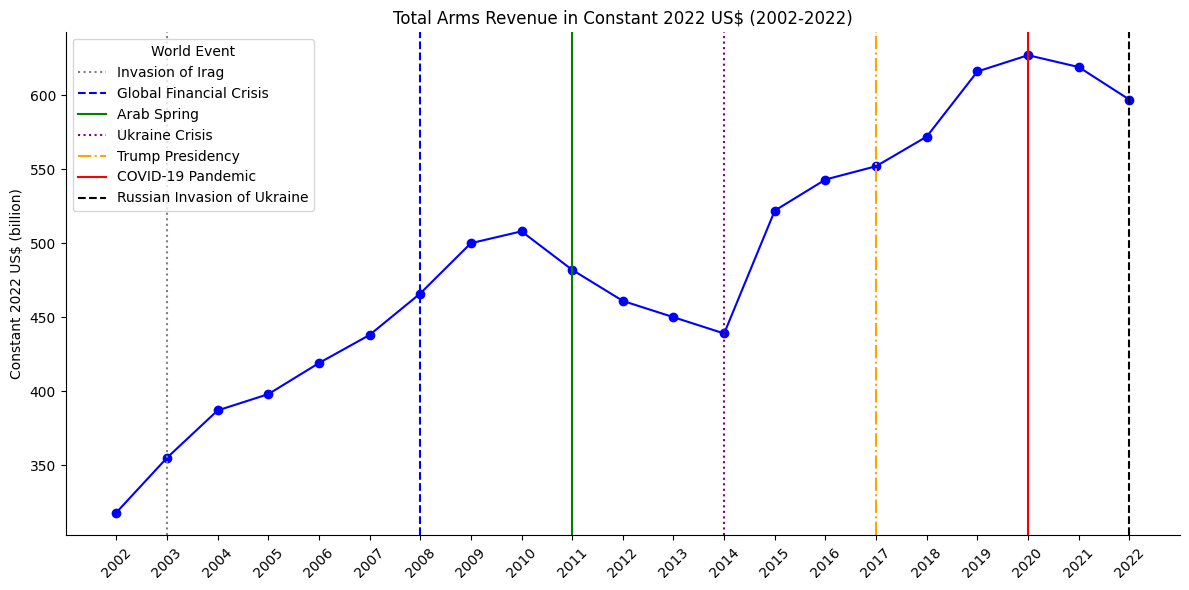

In [140]:
# The data is in a trickier format, so the cleaning is a bit messy

# Extract the relevant data for 'constant 2022 US$ (billion)'
df_constant_usd = df.iloc[3, 1:-1]  # Row index 3 is for 'constant 2022 US$ (billion)'

# Create a new DataFrame for the plot
years = df.columns[1:-1].astype(int)  # Exclude the first and last column (years) and convert to int
constant_usd_values = df_constant_usd.values


# Define the key events
key_events = {
    '2003': {'name': 'Invasion of Irag', 'color': 'grey', 'linestyle': ':'},
    '2008': {'name': 'Global Financial Crisis', 'color': 'blue', 'linestyle': '--'},
    '2011': {'name': 'Arab Spring', 'color': 'green', 'linestyle': '-'},
    '2014': {'name': 'Ukraine Crisis', 'color': 'purple', 'linestyle': ':'},
    '2017': {'name': 'Trump Presidency', 'color': 'orange', 'linestyle': '-.'},
    '2020': {'name': 'COVID-19 Pandemic', 'color': 'red', 'linestyle': '-'},
    '2022': {'name': 'Russian Invasion of Ukraine', 'color': 'black', 'linestyle': '--'}
}

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(years, constant_usd_values, marker='o', linestyle='-', color='b')

# Adding vertical lines for key events
for year, event in key_events.items():
    plt.axvline(x=int(year), color=event['color'], linestyle=event['linestyle'], label=event['name'])

# Set x-ticks to show each year
plt.xticks(range(2002, 2023), rotation=45)

# Adjust x-axis to include the year 2001
plt.xlim(2001, 2023)

plt.xlabel('')
plt.ylabel('Constant 2022 US$ (billion)')
plt.title('Total Arms Revenue in Constant 2022 US$ (2002-2022)')
plt.legend(title='World Event', loc='upper left')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()

# Display the plot
plt.show()